## Import Libraries

Import the necessary Python libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

## Load Data

Load movies csv file and perform two tasks while loading:

Convert date field to datetime.date type
Convert all column with json data as json type

In [3]:
def load_movies_metadata(file_path):
    df = pd.read_csv(file_path, dtype='unicode')
    # covert each item of release_date to datetime.date type entity
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: x.date())
    # all json columns`
    json_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
    for column in json_columns:
        # use ast because json data has single quotes in the csv, which is invalid for a json object; it should be " normally
        df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    return df

Load the movies metadata csv file

In [4]:
movies = load_movies_metadata(r"D:\uChicago\Classes\Q2\Data Mining\project\the-movies-dataset\movies_metadata.csv")

In [5]:
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92


Let's see how many observations are null for each column.

In [6]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                90
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Below code does some more exploratory data analysis

In [7]:
movies.shape

(45466, 24)

In [8]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45376 non-null object
revenue                  45460 non-null object
runtime                  45203 non-null object
spoken_languages         45460 non-null object
status                   45379 non-null object


## Data Visualization

Let's plot the most profitable movie genre using 'revenue' and 'genre' information.

In [ ]:
genre_revenue = {}

for i in range(movies.shape[0]):
    for item in movies['genres'][i]:
        if 'name' in item and movies.iloc[i]['revenue'] is not np.nan:
            a = item['name']
            b = int(movies.iloc[i]['revenue'])/1000000
            if a in genre_revenue:
                genre_revenue[a]['total_revenue'] += b 
            else:
                genre_revenue[a] = {}
                genre_revenue[a]['genre'] = a
                genre_revenue[a]['total_revenue'] = b

most_profitable_genre = pd.DataFrame(None,None,columns=['genre','revenue'])

for k,v in genre_revenue.items():
    most_profitable_genre =  most_profitable_genre.append({'genre':v['genre'],'revenue':v['total_revenue']},ignore_index=True)

In [143]:
most_profitable_genre = most_profitable_genre.sort_values(by='revenue',ascending=False)

In [144]:
most_profitable_genre.head()

,genre,revenue
7,Action,201456.461294
3,Adventure,200119.343481
1,Comedy,166897.270043
6,Drama,160844.199830
9,Thriller,129821.552609


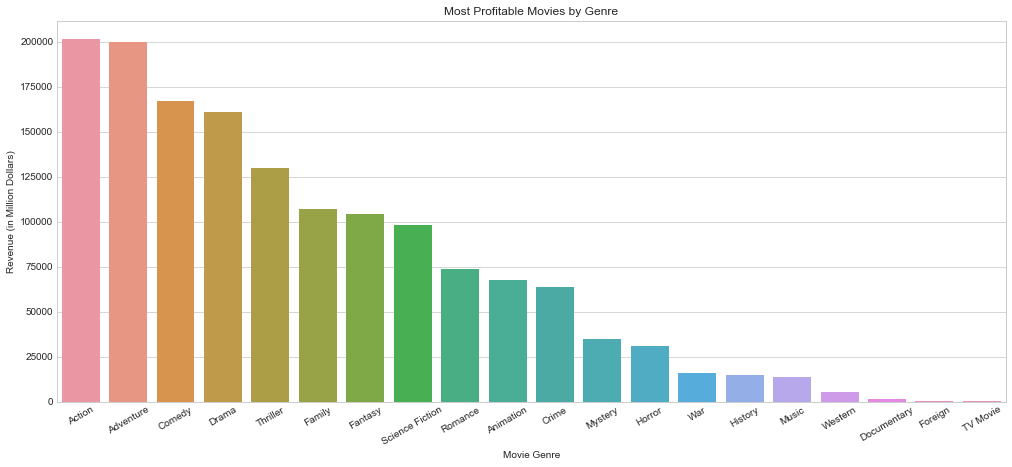

In [149]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x=most_profitable_genre['genre'],y=most_profitable_genre['revenue'])
x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("Revenue (in Million Dollars)")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Most Profitable Movies by Genre")

We can also plot the most popular genre in termn of popularity points.

Below row had to be dropped because it contains invalid values.

In [ ]:
movies.drop(movies.index[35587],inplace=True)

In [137]:
genre_popularity = {}

for i,_ in movies.iterrows():
    for item in movies['genres'][i]:
        if 'name' in item and movies.iloc[i]['popularity'] is not np.nan:
            a = item['name']
            b = float(movies.iloc[i]['popularity'])
            if a in genre_popularity:
                genre_popularity[a]['total_popularity_points'] += b 
                genre_popularity[a]['total_popularity_counts'] += 1
            else:
                genre_popularity[a] = {}
                genre_popularity[a]['genre'] = a
                genre_popularity[a]['total_popularity_points'] = b
                genre_popularity[a]['total_popularity_counts'] = 0

most_popular_genre = pd.DataFrame(None,None,columns=['genre','average_popularity_points'])

for k,v in genre_popularity.items():
    most_popular_genre =  most_popular_genre.append({'genre':v['genre'],'average_popularity_points':v['total_popularity_points']/v['total_popularity_counts']},ignore_index=True)

In [146]:
most_popular_genre = most_popular_genre.sort_values(by='average_popularity_points',ascending=False)

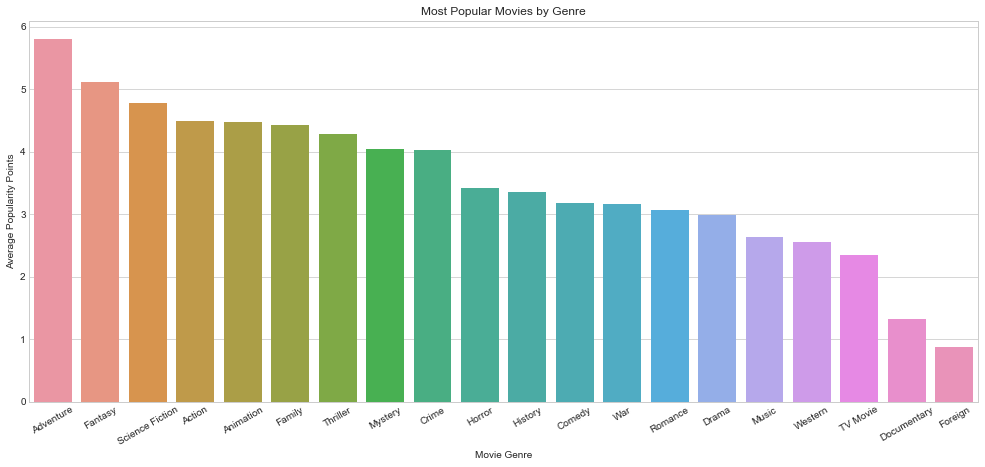

In [150]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x=most_popular_genre['genre'],y=most_popular_genre['average_popularity_points'])
x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("Average Popularity Points")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Most Popular Movies by Genre")

Next, let's plot the genres by longest runtime.

In [161]:
genre_length = {}

for i,_ in movies.iterrows():
    for item in movies['genres'][i]:
        if 'name' in item and movies.iloc[i]['runtime'] is not np.nan:
            a = item['name']
            b = float(movies.iloc[i]['runtime'])
            if a in genre_length:
                genre_length[a]['total_runtime_time'] += b 
                genre_length[a]['total_runtime_count'] += 1
            else:
                genre_length[a] = {}
                genre_length[a]['genre'] = a
                genre_length[a]['total_runtime_time'] = b
                genre_length[a]['total_runtime_count'] = 0

longest_runtime_genre = pd.DataFrame(None,None,columns=['genre','average_runtime'])

for k,v in genre_length.items():
    longest_runtime_genre =  longest_runtime_genre.append({'genre':v['genre'],'average_runtime':v['total_runtime_time']/v['total_runtime_count']},ignore_index=True)

In [153]:
longest_runtime_genre = longest_runtime_genre.sort_values(by='average_runtime',ascending=False)

In [154]:
longest_runtime_genre.head()

,genre,average_runtime
11,History,119.796270
14,War,109.023556
6,Drama,101.459318
5,Romance,101.265723
3,Adventure,100.345867


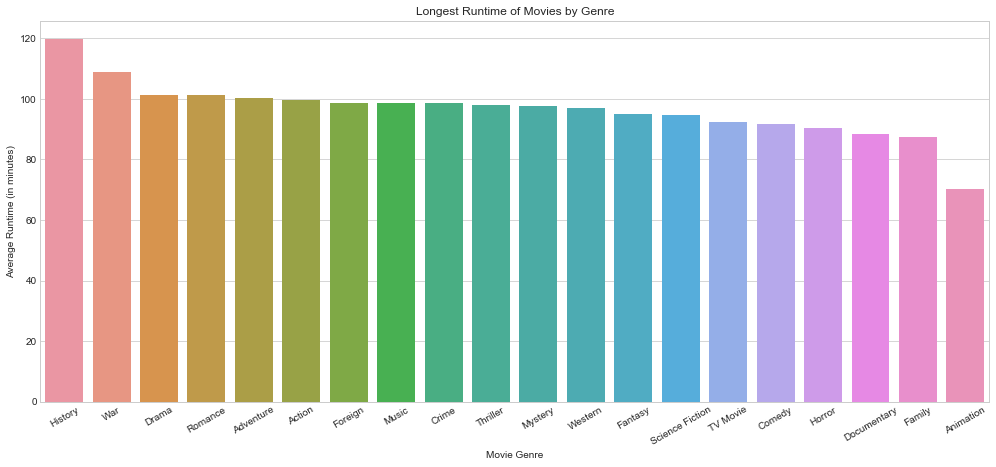

In [156]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x=longest_runtime_genre['genre'],y=longest_runtime_genre['average_runtime'])
x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("Average Runtime (in minutes)")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Longest Runtime of Movies by Genre")

We can also see maximum vote count for each movie genre.

In [162]:
genre_vote_count = {}

for i,_ in movies.iterrows():
    for item in movies['genres'][i]:
        if 'name' in item and movies.iloc[i]['vote_count'] is not np.nan:
            a = item['name']
            b = int(movies.iloc[i]['vote_count'])/1000000
            if a in genre_vote_count:
                genre_vote_count[a]['total_votes'] += b 
            else:
                genre_vote_count[a] = {}
                genre_vote_count[a]['genre'] = a
                genre_vote_count[a]['total_votes'] = b

most_votes_genre = pd.DataFrame(None,None,columns=['genre','total_votes'])

for k,v in genre_vote_count.items():
    most_votes_genre =  most_votes_genre.append({'genre':v['genre'],'total_votes':v['total_votes']},ignore_index=True)

In [163]:
most_votes_genre = most_votes_genre.sort_values(by='total_votes',ascending=False)

In [164]:
most_votes_genre.head()

,genre,total_votes
6,Drama,1.940302
7,Action,1.649049
1,Comedy,1.412799
9,Thriller,1.389672
3,Adventure,1.389324


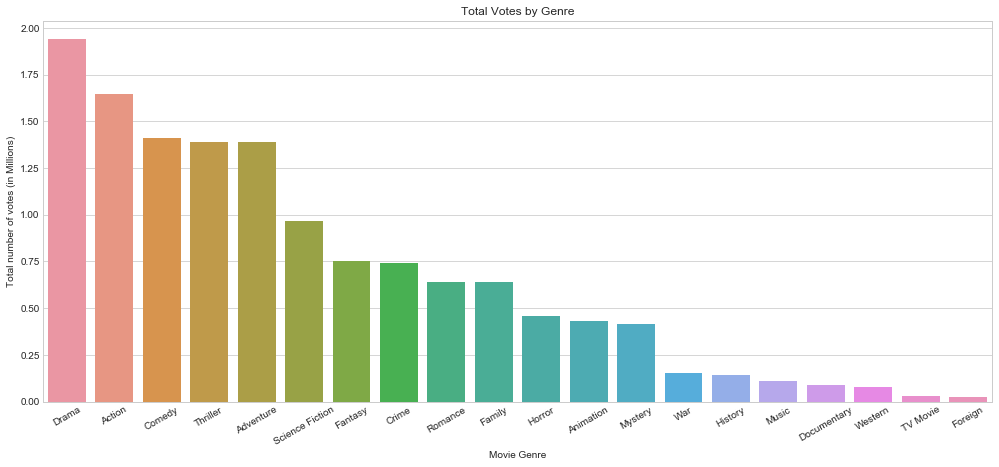

In [165]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x=most_votes_genre['genre'],y=most_votes_genre['total_votes'])
x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("Total number of votes (in Millions)")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Total Votes by Genre")

And we can also see average votes for each movie genre.

In [166]:
genre_average_votes = {}

for i,_ in movies.iterrows():
    for item in movies['genres'][i]:
        if 'name' in item and movies.iloc[i]['vote_average'] is not np.nan:
            a = item['name']
            b = float(movies.iloc[i]['vote_average'])
            if a in genre_average_votes:
                genre_average_votes[a]['total_votes_points'] += b 
                genre_average_votes[a]['total_votes_counts'] += 1
            else:
                genre_average_votes[a] = {}
                genre_average_votes[a]['genre'] = a
                genre_average_votes[a]['total_votes_points'] = b 
                genre_average_votes[a]['total_votes_counts'] = 1

highest_voted_genre = pd.DataFrame(None,None,columns=['genre','average_votes'])

for k,v in genre_average_votes.items():
    highest_voted_genre =  highest_voted_genre.append({'genre':v['genre'],'average_votes':v['total_votes_points']/v['total_votes_counts']},ignore_index=True)

In [167]:
highest_voted_genre = highest_voted_genre.sort_values(by='average_votes',ascending=False)

In [169]:
highest_voted_genre.head()

,genre,average_votes
0,Animation,6.060858
11,History,6.033047
14,War,5.974225
6,Drama,5.868718
8,Crime,5.864801


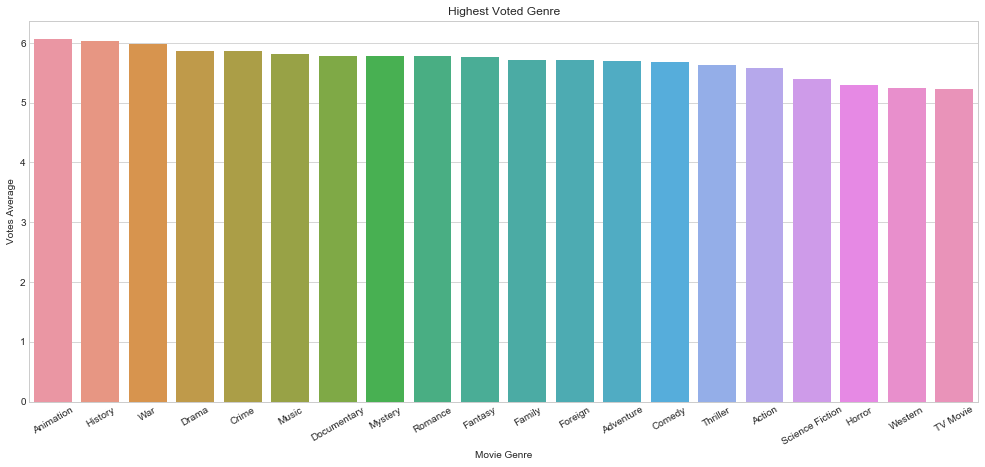

In [170]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x=highest_voted_genre['genre'],y=highest_voted_genre['average_votes'])
x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("Votes Average")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Highest Voted Genre")

Below code prints unique list of languages in the dataset

In [173]:
langs = []

for i,row in movies.iterrows():
    if row['spoken_languages'] is not np.nan:
        a = row['spoken_languages']
        for item in a:
            if item['name'] not in langs:
                langs.append(item['name'])

print(langs)

['English', 'Français', 'Español', 'Deutsch', 'Pусский', 'Latin', 'Nederlands', '广州话 / 廣州話', '普通话', 'Magyar', 'shqip', 'Italiano', '한국어/조선말', 'فارسی', 'Dansk', '', '日本語', 'العربية', 'Hrvatski', 'Bosanski', 'Română', 'Bahasa indonesia', 'Bahasa melayu', 'svenska', 'עִבְרִית', 'Český', 'Polski', 'Gaeilge', 'Norsk', 'Slovenčina', 'Tiếng Việt', 'Português', 'हिन्दी', 'Català', 'Íslenska', 'Afrikaans', 'Srpski', 'বাংলা', 'Wolof', 'Cymraeg', 'ภาษาไทย', 'Latviešu', 'Kiswahili', 'български език', 'ελληνικά', 'Türkçe', 'suomi', 'Esperanto', 'Український', 'ქართული', 'Bokmål', 'No Language', 'euskera', 'Azərbaycan', 'Malti', 'اردو', 'isiZulu', 'Bamanankan', 'پښتو', 'Somali', 'ਪੰਜਾਬੀ', 'беларуская мова', 'தமிழ்', 'Galego', 'Kinyarwanda', 'қазақ', 'Eesti', 'Lietuvi\x9akai', 'Slovenščina', 'తెలుగు', 'Fulfulde', '??????', '?????', 'ozbek', 'Hausa']


Below rows had to be delted because of the incorrect data placement in these rows

In [174]:
movies.drop(movies.index[19730],inplace=True)
movies.drop(movies.index[29502],inplace=True)
movies.drop(movies.index[35585],inplace=True)

Below code prints unique list of countries in the dataset

In [175]:
countries = []

for i,row in movies.iterrows():
    if row['production_countries'] is not np.nan:
        a = row['production_countries']
        for item in a:
            if item['name'] not in countries:
                countries.append(item['name'])

print(countries)

['United States of America', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'China', 'Australia', 'South Africa', 'Canada', 'Switzerland', 'Belgium', 'Japan', 'Iran', 'Netherlands', 'Hong Kong', 'Tunisia', 'Ireland', 'Dominican Republic', 'Croatia', 'Russia', 'Macedonia', 'Austria', 'Taiwan', 'New Zealand', 'Mexico', 'Poland', 'Peru', 'Cuba', 'Liechtenstein', 'Denmark', 'Portugal', 'Finland', 'Sweden', 'Argentina', 'Iceland', 'South Korea', 'Serbia', 'Hungary', 'Czech Republic', 'India', 'Brazil', 'Greece', 'Congo', 'Senegal', 'Burkina Faso', 'Romania', 'Philippines', 'Vietnam', 'Trinidad and Tobago', 'Bulgaria', 'Chile', 'Norway', 'Kazakhstan', 'Algeria', 'Luxembourg', 'Georgia', 'Ukraine', 'Botswana', 'Aruba', 'Israel', 'Turkey', 'Ecuador', 'Lebanon', 'Morocco', 'Bosnia and Herzegovina', 'Bahamas', 'Malaysia', 'Bhutan', 'Jamaica', 'Pakistan', 'Nepal', "Cote D'Ivoire", 'Thailand', 'Namibia', 'Cameroon', 'Colombia', 'Czechoslovakia', 'Uruguay', 'Slovenia', 'Libyan Arab Jamahi

Below code prints unique list of genres in the dataset

In [177]:
genres = []

for i,row in movies.iterrows():
    if row['genres'] is not np.nan:
        a = row['genres']
        for item in a:
            if item['name'] not in genres:
                genres.append(item['name'])

print(genres)

['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']


In the next notebook, we do some tranformations to deserialize json in order to process them later